# In Decision Tree, we need to tune 2 hyper-parameters : max_depth & min_samples_split

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

In [2]:
# Reading the data file into a DATAFRAME and checking the shape 
data=pd.read_csv('35.1AmazonMobileDataUncleaned.csv')
print(data.shape)

(71922, 2)


In [3]:
def datapreprocess(sen):
    
    sen = re.sub(r"didn't", "did not", sen)
    sen = re.sub(r"don't", "do not", sen)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r"wasn't", "do not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"n\'t", " not", sen)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    sen=sen.lower() # convert text to lower case
    words=sen.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    

stop=set(stopwords.words('english'))
print(stop)
stop.remove('no')
stop.remove('not')
stop.remove('nor')

preprocessed_essays = []
for sentance in data['uncleanedreview'].values:
    try:
        ctxt=datapreprocess(str(sentance))
        if len(ctxt)==0: raise()
        ctxt = ' '.join(e for e in ctxt.split() if e not in stop)
        preprocessed_essays.append(ctxt.lower().strip())
    except:
        preprocessed_essays.append("NAN")  
data['cleanedtext'] = preprocessed_essays
data.drop(data[data["cleanedtext"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
data['decision']= data['decision'].replace('positive',1)
data['decision']= data['decision'].replace('negative',0)


s = SnowballStemmer("english")
p=[]
for i in data['cleanedtext'].values:
    k=[]
    for word in i.split():
        k.append(s.stem(word))
    l=' '.join(k)
    p.append(l)

data['j']=p

data.to_csv (r'AmazonMobileDataCleaned.csv')

{'most', 'that', 'very', 'only', 'ain', 'won', 'whom', 'don', 'again', 'further', 'of', 'm', 'so', 'because', 'how', 'these', 'hers', 'yourselves', "isn't", "doesn't", 'll', 'off', "aren't", "wasn't", 'up', 'if', 'shan', 'do', 'have', 'but', 'myself', 'as', 'wouldn', 'our', 'over', 're', "couldn't", 'her', "haven't", 'didn', 'all', 'doesn', "wouldn't", 'wasn', 'why', 'd', 'those', 'having', 'she', 'they', 'before', 'i', 'here', "mustn't", 'herself', 'this', 'below', 's', 'few', "you'll", 'between', 'will', 'hadn', 'at', 't', 'hasn', 'for', 'am', 'about', "hadn't", 'are', 'be', 'can', 'themselves', 'y', 'or', "you'd", "weren't", 'is', 'haven', 'out', 'aren', 'shouldn', 'isn', 'an', 'in', "hasn't", 'there', 'yourself', 'my', 'against', 'ourselves', 'down', 'under', 'been', 'after', 'more', 'than', "she's", "it's", "don't", 'mightn', 'it', 'its', 'then', 'until', 'weren', 'such', 'each', 'where', "you've", 'ma', 'which', 'to', 'not', 'what', 'does', 'couldn', 'from', 'their', 'your', 'no'

In [4]:
data=pd.read_csv('AmazonMobileDataCleaned.csv',nrows=5000)
print(data.shape)
label = data['decision'].values
feedback = data.drop(['decision'], axis=1)
print(label.shape)
print(feedback.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
inputtrain, inputtest, outputtrain, outputtest = train_test_split(feedback, label, test_size=0.20, stratify=label)
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)

(5000, 5)
(5000,)
(5000, 4)
------------------------------
(4000, 4)
(1000, 4)
(4000,)
(1000,)


# Bag Of Words

In [5]:
# convert into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
featur = []
vec = CountVectorizer(min_df=10,ngram_range=(1,4))
vec.fit(inputtrain['j'].values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain['j'].values)
test_cleanedtext= vec.transform(inputtest['j'].values)

print("After vectorizations")
print(train_cleanedtext.shape)
print(test_cleanedtext.shape)
print(outputtrain.shape)
print(outputtest.shape)
print("...............................")

featur= featur+vec.get_feature_names()#features got using back of words

After vectorizations
(4000, 2765)
(1000, 2765)
(4000,)
(1000,)
...............................


In [6]:
print(featur)

['abil', 'abl', 'abl find', 'abl get', 'abl use', 'absolut', 'absolut love', 'abus', 'accept', 'access', 'accessori', 'accid', 'accident', 'accord', 'account', 'accur', 'across', 'act', 'action', 'activ', 'activ phone', 'activ verizon', 'actual', 'ad', 'adapt', 'add', 'addit', 'address', 'adequ', 'adjust', 'admit', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'afford', 'afraid', 'age', 'ago', 'agre', 'ahead', 'alarm', 'alarm clock', 'alert', 'allow', 'almost', 'almost year', 'alon', 'along', 'alot', 'alreadi', 'also', 'also get', 'also good', 'also not', 'also phone', 'also use', 'altern', 'although', 'although not', 'alway', 'amaz', 'amazon', 'amol', 'amol screen', 'amount', 'android', 'android appl', 'android devic', 'android io', 'android iphon', 'android not', 'android os', 'android phone', 'android window', 'anim', 'announc', 'annoy', 'anoth', 'anoth one', 'anoth phone', 'answer', 'antenna', 'anymor', 'anyon', 'anyon look', 'anyth', 'anyth els', 'anyway', 'anywher', 'apart'

# TF-IDF

In [7]:
# convert into TF-IDF
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vec.fit(inputtrain['j'].values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain['j'].values)
test_cleanedtext= vec.transform(inputtest['j'].values)

print("After vectorizations")
print(train_cleanedtext.shape)
print(test_cleanedtext.shape)
print(outputtrain.shape)
print(outputtest.shape)
print("...............................")

featur = []
featur= featur+vec.get_feature_names()#features got using TF-IDF

After vectorizations
(4000, 2765)
(1000, 2765)
(4000,)
(1000,)
...............................


# use GridSearchCV() to find the 2 best hyper-parameter values

TRAIN SCORE


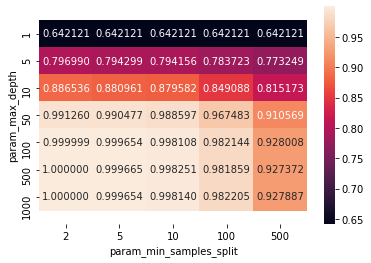

TEST SCORE


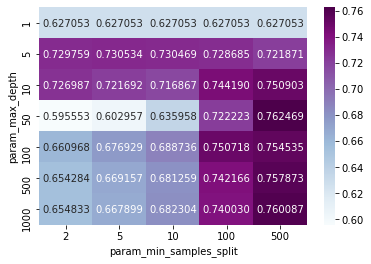

Best hyper-parameters values:  {'max_depth': 50, 'min_samples_split': 500}
Best CV ROCAUC for above hyper-parameters values: 0.7624687229816293 ---> Accuracy


In [8]:
import math
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

neigh = DecisionTreeClassifier()


# we need to tune 2 hyper-parameter
# Different combinations of hyper-paramter values to DecisionTree Model : (1,2),(1,5),(1,10),(1,100),(1,500)
# (5,2),(5,5),....(5,500)
#....
#....
#....
#(1000,2),(1000,5),(1000,10),(1000,100),(1000,500)

#Among all these combinations, select the best combo of hyperparamter value which gives MAX CV ROCAUC Value
parameters = {'max_depth': [1, 5, 10, 50, 100,500,1000],
                  'min_samples_split': [2, 5, 10,100,500]}


clf = GridSearchCV(neigh, parameters,cv=3, scoring='roc_auc',return_train_score='true')
clf.fit(train_cleanedtext, outputtrain)

results = pd.DataFrame.from_dict(clf.cv_results_)#construct a dataFrame from dictionary
results = results.sort_values(['param_max_depth'])#sort the dataFrame using 'param_max_depth'

print("TRAIN SCORE")
r1=results.pivot("param_max_depth","param_min_samples_split","mean_train_score")#form pivot table(dataframe) using "param_max_depth","param_min_samples_split","mean_train_score" 
sns.heatmap(r1,annot=True,fmt='f')

# Displaying heatmap within specified distance above one another
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()


print("TEST SCORE")
r2=results.pivot("param_max_depth","param_min_samples_split","mean_test_score")
sns.heatmap(r2,annot=True,fmt='f',cmap='BuPu')
plt.show()


print("Best hyper-parameters values: ",clf.best_params_)
print(f"Best CV ROCAUC for above hyper-parameters values: {clf.best_score_} ---> Accuracy")


In [9]:
results = pd.DataFrame.from_dict(clf.cv_results_).sort_values(['param_max_depth'])
results.pivot("param_max_depth","param_min_samples_split","mean_train_score")

param_min_samples_split,2,5,10,100,500
param_max_depth,,,,,
1,0.642121,0.642121,0.642121,0.642121,0.642121
5,0.796990,0.794299,0.794156,0.783723,0.773249
10,0.886536,0.880961,0.879582,0.849088,0.815173
50,0.991260,0.990477,0.988597,0.967483,0.910569
100,0.999999,0.999654,0.998108,0.982144,0.928008
500,1.000000,0.999665,0.998251,0.981859,0.927372
1000,1.000000,0.999654,0.998140,0.982205,0.927887


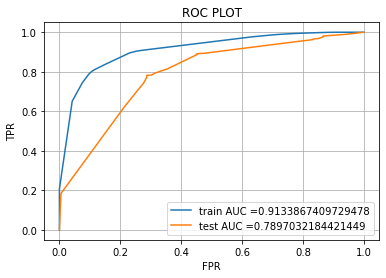

---------------------------------------------------
the maximum value of tpr*(1-fpr) 0.7173052362707535 for threshold 0.792
Train confusion matrix


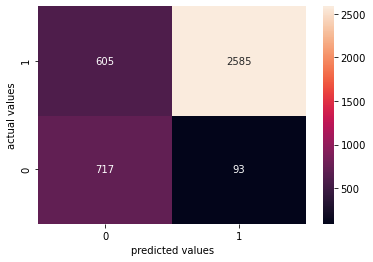

Test confusion matrix


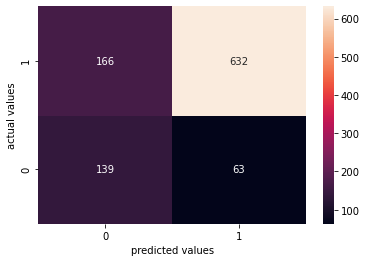

In [10]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# use the 2 best hyperparameter value to train the model
neigh = DecisionTreeClassifier(max_depth=50,min_samples_split=500)
neigh.fit(train_cleanedtext, outputtrain)



y_train_pred = neigh.predict_proba(train_cleanedtext)[:,1]    
y_test_pred = neigh.predict_proba(test_cleanedtext)[:,1]
#print(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(outputtrain, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(outputtest, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()


def bestthreshold(threshould, fpr, tpr):# function to predict best threshold on Training dataset
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predictusingbestt(proba, threshould):#prediction using best threshold
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("---------------------------------------------------")


from sklearn.metrics import confusion_matrix
best_t = bestthreshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")

ax=sns.heatmap(confusion_matrix(outputtrain, predictusingbestt(y_train_pred, best_t)),annot=True,fmt='d')
ax.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
print("Test confusion matrix")


bx=sns.heatmap(confusion_matrix(outputtest, predictusingbestt(y_test_pred, best_t)),annot=True,fmt='d')
bx.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [16]:
confusion_matrix(outputtrain, predictusingbestt(y_train_pred, best_t))

numpy.ndarray

In [14]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(neigh, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featur)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('amazon.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [13]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'